In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_raw=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df_raw.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_raw.shape

(7043, 21)

In [ ]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_raw.isnull().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
df_raw.duplicated().any()

np.False_

In [ ]:
df_raw.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# need to rename columns into proper format
# Also need to change data type of TotalCharges to float.

In [ ]:
def Data_transformation_renaming(df_raw):
    """ Rename column names and transformed into proper format and return dataframe """
    df_cal = df_raw.copy()

    df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)


    df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
    df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

    df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
    df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

    df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
    df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
    df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})


    df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})

    # Data transformation

    # Converting TotalCharges into Numeric some of the records are empty so converting them to nan
    df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan

    # First we convert TotalCharges to float and replace with (tenure)*(monthly charges)
    df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
    df_cal.loc[df_cal['TotalCharges'].isnull()==True,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['Tenure']


    return df_cal

In [ ]:
df_cal = Data_transformation_renaming(df_raw)

In [ ]:
df_cal.head(5)


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


# seperated the categorial , numerical , target columns

In [ ]:
cat_cols = ["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","IsContracted"
                    ,"ContractType","PaperlessBilling","PaymentMethod"]


num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

target_col = 'Churn'

# again dividing the categorial columns to nominal and binary columns

In [ ]:
nominal_cols = ['Gender','InternetServiceType','PaymentMethod','ContractType']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
               ,'OnlineBackup' ,'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies'
               ,'PaperlessBilling','InternetService', 'IsContracted']

In [ ]:
df_cal[cat_cols].describe(include='all')

,Gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,IsContracted,ContractType,PaperlessBilling,PaymentMethod
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043
unique,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4
top,Male,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check
freq,3555,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365
mean,NaN,0.483033,0.299588,0.162147,0.903166,0.421837,NaN,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,NaN,0.592219,NaN
std,NaN,0.499748,0.458110,0.368612,0.295752,0.493888,NaN,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,NaN,0.491457,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN


In [ ]:
df_cal[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Based on numerical columns. average tenure is 32 months, average monthly charges 64 dollors and total charges of subscriber is 2282 dollars

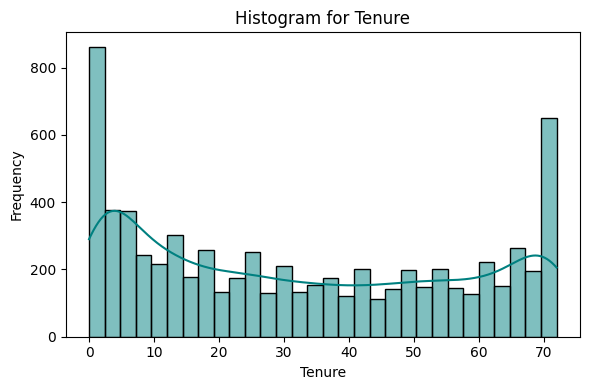

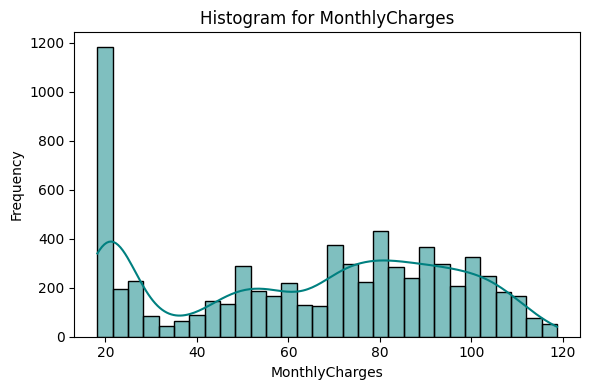

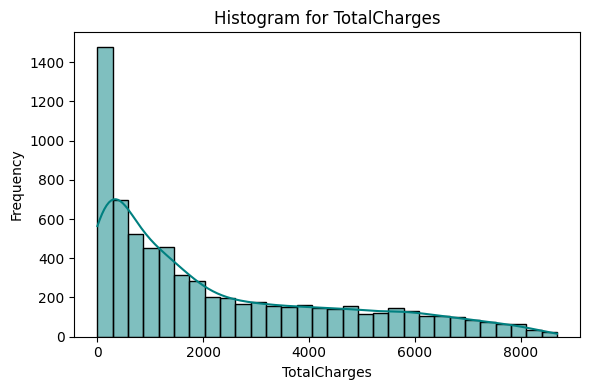

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def outlier_histogram(df, col):
    """Display histogram for a given column"""
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color='teal')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

for col in num_cols:
    outlier_histogram(df_cal, col)


# Calculate Churn Rate

In [ ]:
import matplotlib.pyplot as plt

def Generate_bar_graph(x, y, x_title, y_title, chart_title, color='skyblue'):
    """ Generate a bar graph for churn distribution """

    fig, ax = plt.subplots()
    ax.bar(range(len(x)), y, width=0.75, color=color, alpha=0.6)

    # Set x and y labels and title
    plt.xticks(range(len(x)), x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title, fontsize=13)
    plt.ylabel(y_title, fontsize=13)
    plt.grid(False)
    plt.ylim(top=1)
    plt.yticks(fontsize=0)  # Hides y-axis ticks

    # Show only bottom x-axis
    for spine in plt.gca().spines.values():
        spine.set_visible(spine.spine_type == 'bottom')

    # Show percentage labels on each bar
    for i, v in enumerate(y):
        ax.text(i, v + 0.05, f"{round(v * 100, 2)}%", fontsize=13, ha='center')

    plt.tight_layout()
    plt.show()


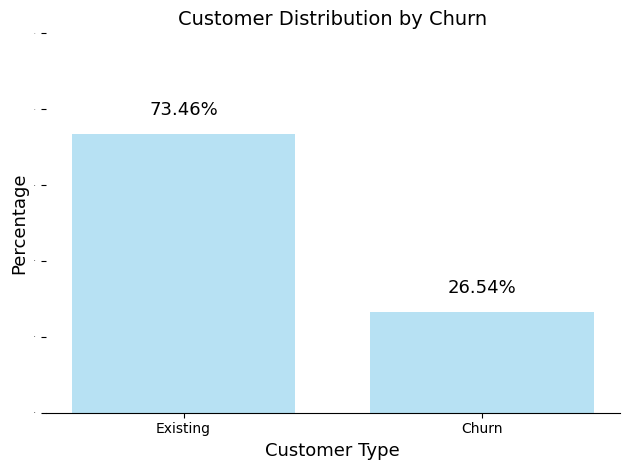

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [ ]:

# 1. Calculate Churn Rate
Churn_rate = df_cal['Churn'].value_counts(normalize=True)

# 2. Generate Bar Graph
Generate_bar_graph(
    x=Churn_rate.index.map({0: 'Existing', 1: 'Churn'}),  # 0 → Existing, 1 → Churn
    y=Churn_rate.values,
    x_title='Customer Type',
    y_title='Percentage',
    chart_title='Customer Distribution by Churn'
)

# 3. Print Raw Churn Values
print(Churn_rate)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False):
    """Generate heatmap from correlation matrix with optional upper triangle masking"""

    # Create mask only if needed
    mask = None
    if mask_uppertri:
        mask = np.triu(np.ones_like(corr, dtype=bool))  # Only upper triangle is True

    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        corr,
        mask=mask,
        square=True,
        annot=True,
        annot_kws={'size': 10.5, 'weight': 'bold'},
        cmap=plt.get_cmap("YlOrBr"),
        linewidths=.1,
        cbar_kws={'shrink': 0.8}
    )
    plt.title(chart_title, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


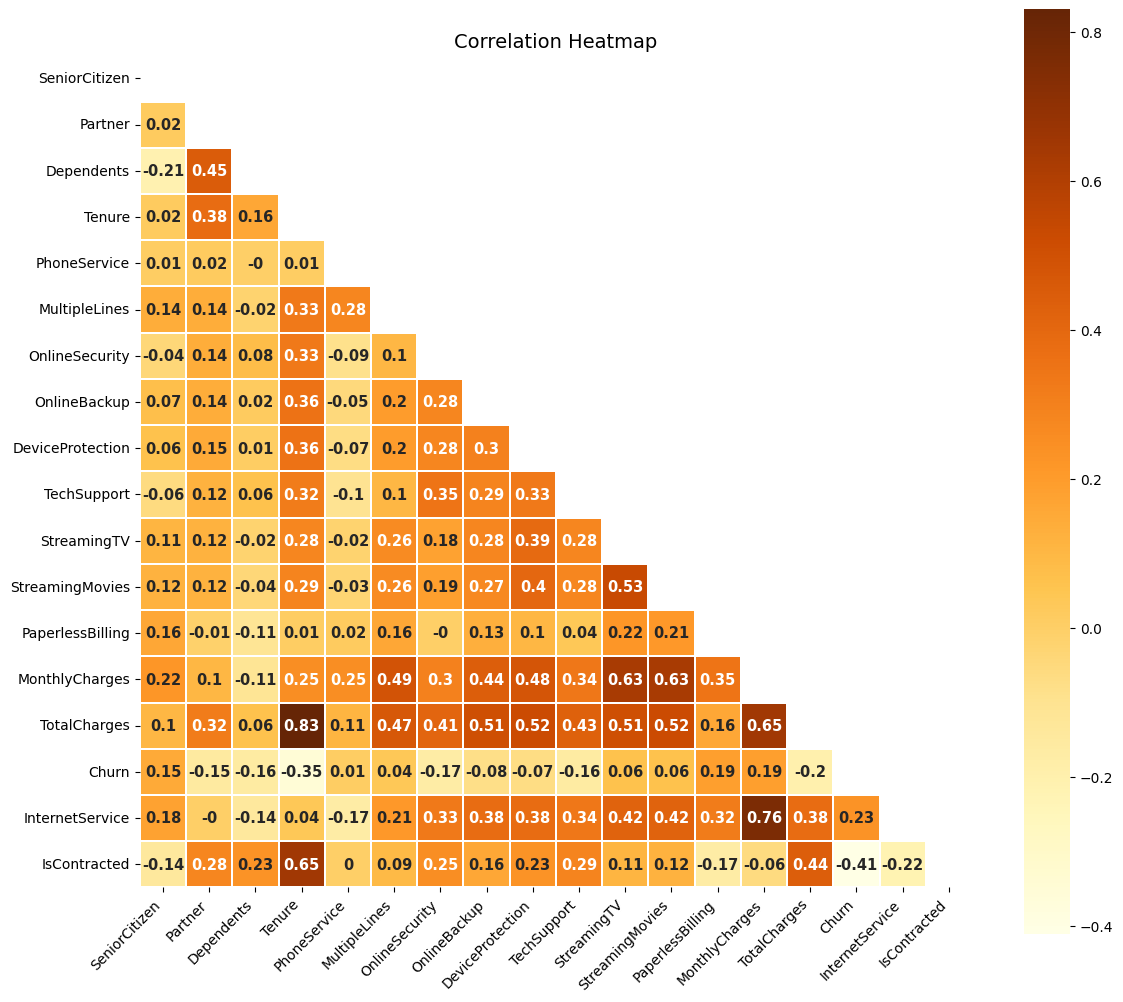

In [ ]:
# Select only numeric columns
numeric_df = df_cal.select_dtypes(include='number')

# Correlation matrix
var_corr = round(numeric_df.corr(), 2)

# Generate heatmap
Generate_heatmap_graph(var_corr, chart_title='Correlation Heatmap', mask_uppertri=True)


# Distribution of features as per churn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define plot color
plotColor = sns.color_palette("pastel")

# Label creator
def Create_data_label(ax):
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.01,
                str(round(100 * bar.get_height(), 2)) + '%',
                ha='center',
                fontsize=13)

# Main plotting function
def Categorical_var_churn_dist(data, cols, distribution_col):
    for feature in cols:
        feature_summary = data.groupby([distribution_col, feature]).size().reset_index(name='count')
        feature_summary['Percentage'] = feature_summary.groupby(distribution_col)['count'].transform(lambda x: x / x.sum())

        plt_cat = sns.catplot(
            x=feature,
            y='Percentage',
            hue=distribution_col,
            data=feature_summary,
            kind='bar',
            aspect=0.8,
            palette=plotColor,
            alpha=0.7
        )

        if feature == 'PaymentMethod':
            plt_cat.set_xticklabels(rotation=65, horizontalalignment='right')

        for ax in plt_cat.axes.flat:
            Create_data_label(ax)

        plt.ylim(top=1)
        plt.subplots_adjust(top=0.9)
        plt.gcf().suptitle(f"{feature} distribution", fontsize=14)

    plt.show()


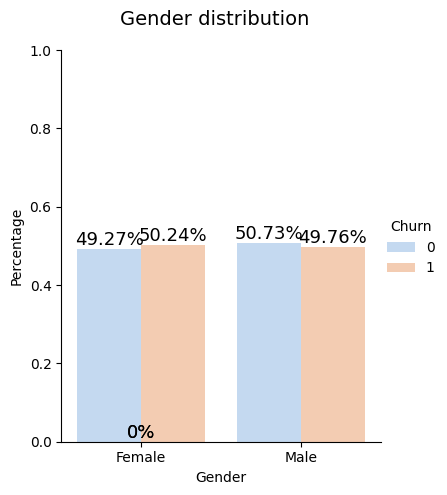

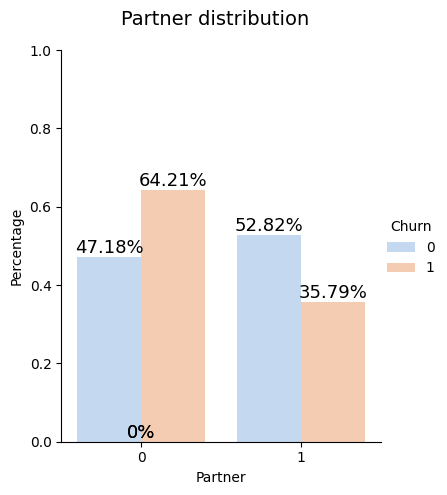

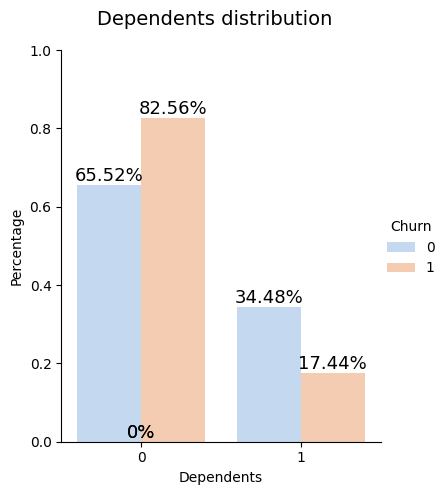

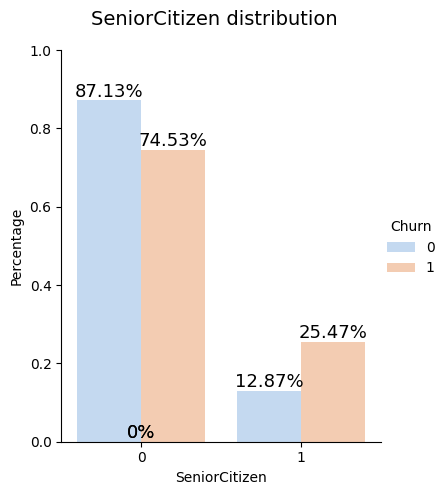

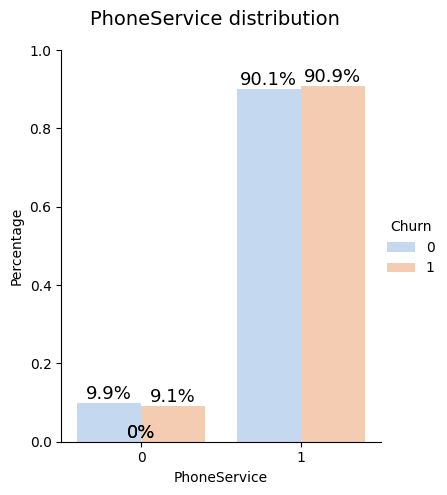

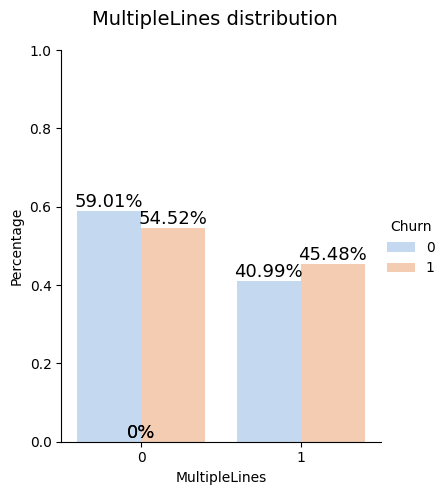

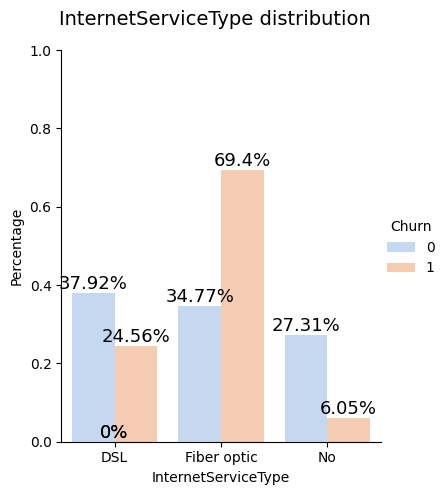

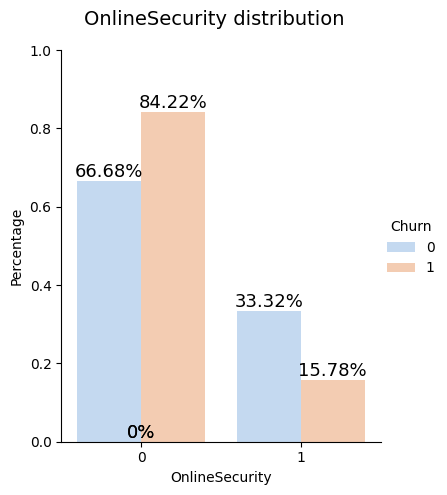

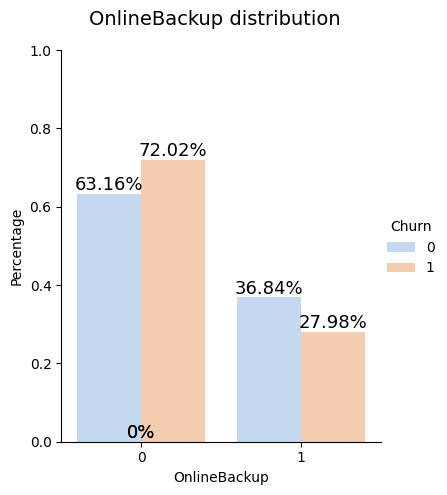

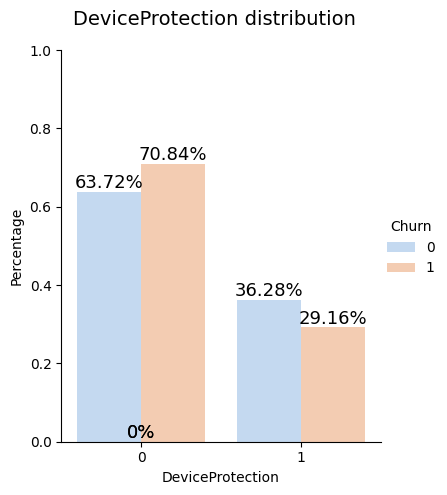

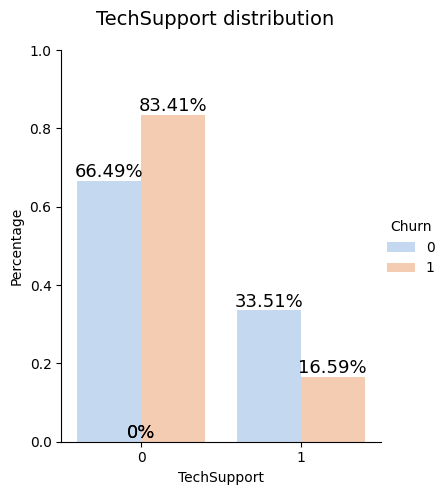

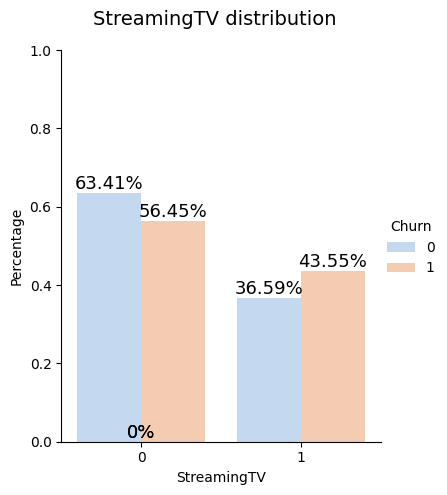

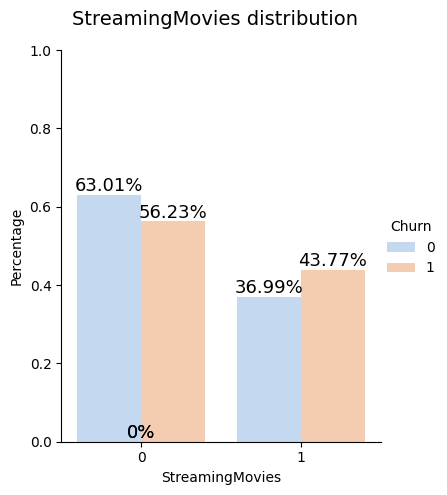

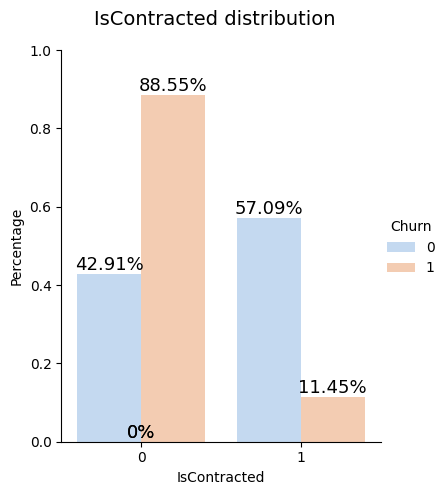

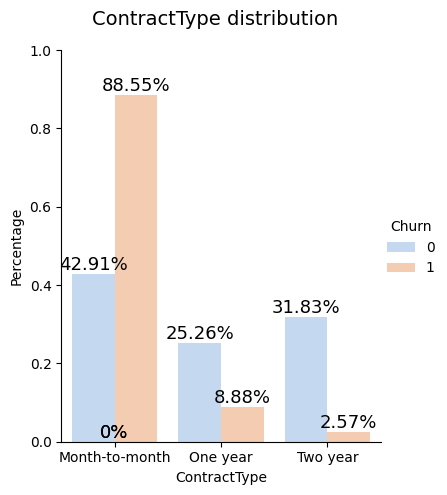

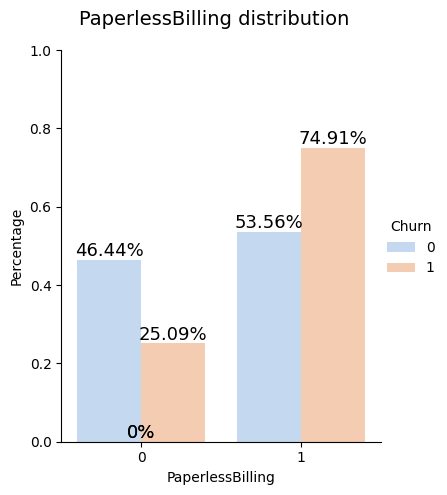

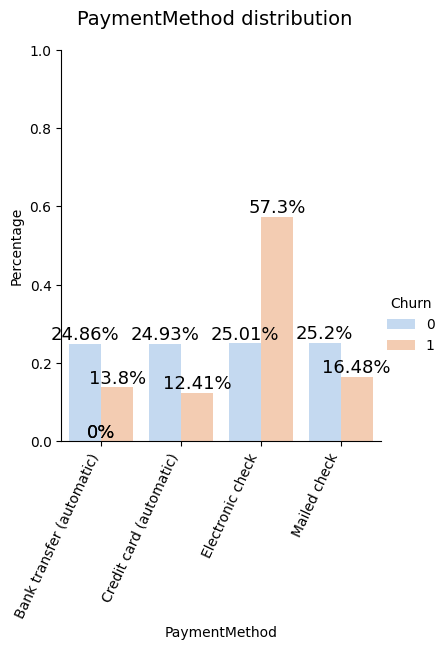

In [ ]:
Categorical_var_churn_dist(df_cal, cat_cols, 'Churn')


**From above analysis, churn customers are likely to**


not have partners and Dependents; Means likely to be Single.

have Internet service and specifically Fiber optics

not have online security service, online backup service, device protection

service, Tech support service

have streaming TV and streaming Movies services

be with monthly based contract

have paperless billing service

have electronic check payment method

In [ ]:
churn_summary = df_cal.groupby('Churn')
print(churn_summary[['Tenure', 'MonthlyCharges', 'TotalCharges']].mean())


          Tenure  MonthlyCharges  TotalCharges
Churn                                         
0      37.569965       61.265124   2549.911442
1      17.979133       74.441332   1531.796094


Result shows that Churn customers have more Monthly charges compared to existing customers.

there is a drastic difference in Tenure and Total Charges for Churn vs existing customers.

In [ ]:
def Numerical_distribution(df_cal,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,10))

    plt.subplot(2,1,1)
    ax = sns.kdeplot(df_cal[feature]
                     , color = 'g'
                     , shade = True)

    title_str = "Original " +feature + " Distribution"
    plt.title(title_str)

    plt.subplot(2,1,2)
    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),feature]
                     , color = 'g'
                     , shade = True
                     , label='Chrun')

    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0) ,feature]
                     , color = 'b'
                     , shade = True
                     , label='No chrun')

    title_str = feature + " Distribution: Churn vs No churn"
    plt.title(title_str)
    plt.show()

**The function produces 2 plots for any numerical feature:**

Overall distribution

Distribution by churn status (churn vs no-churn)

it uses KDE plots — smooth curves showing how many customers fall into different value ranges.

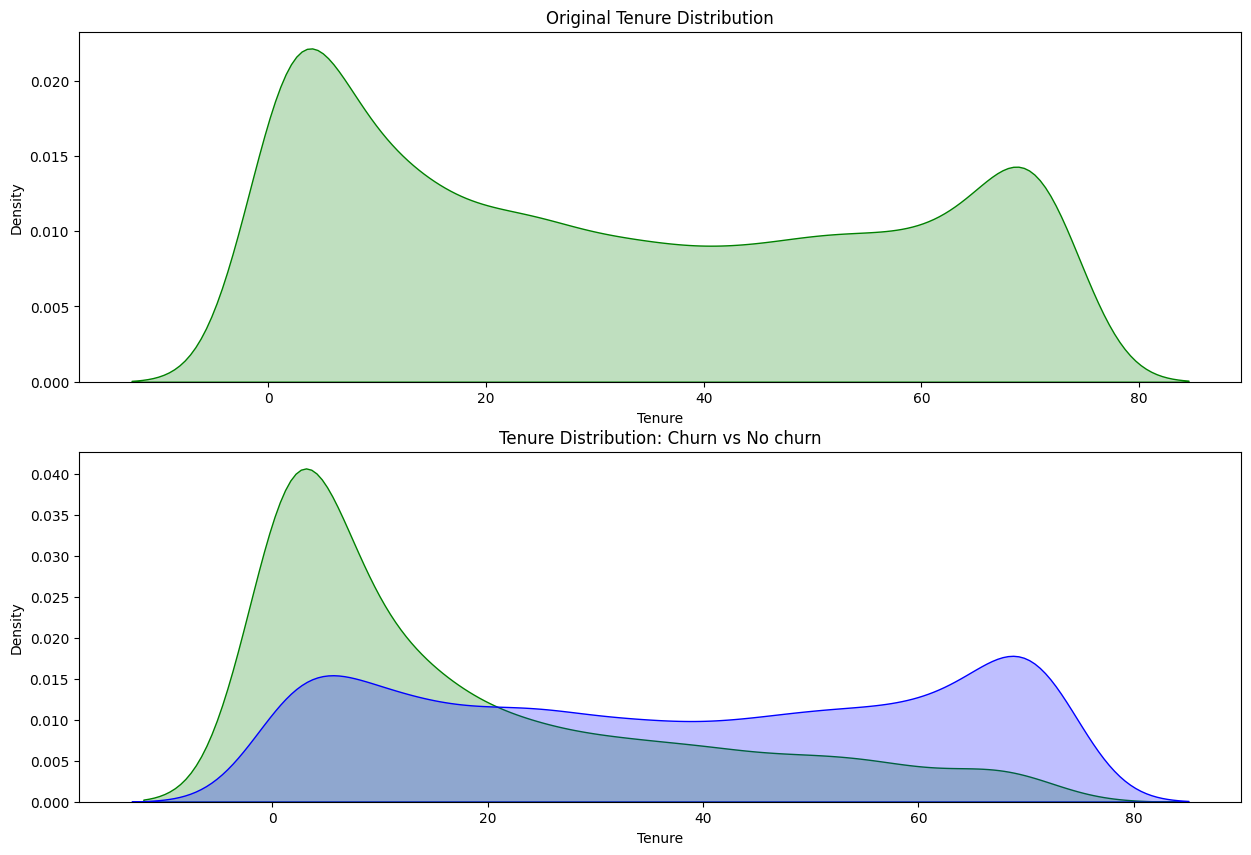

In [ ]:
Numerical_distribution(df_cal,'Tenure')

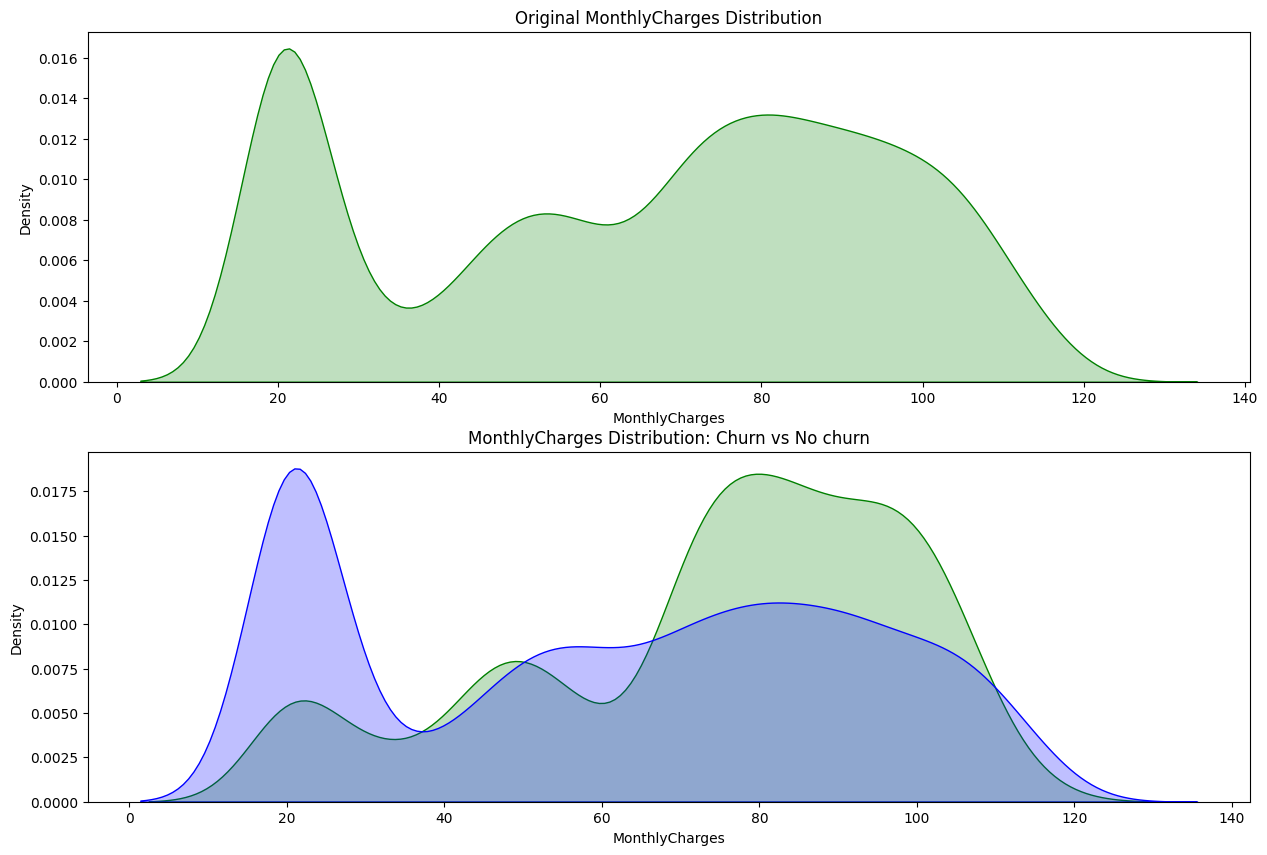

In [ ]:
Numerical_distribution(df_cal,'MonthlyCharges')

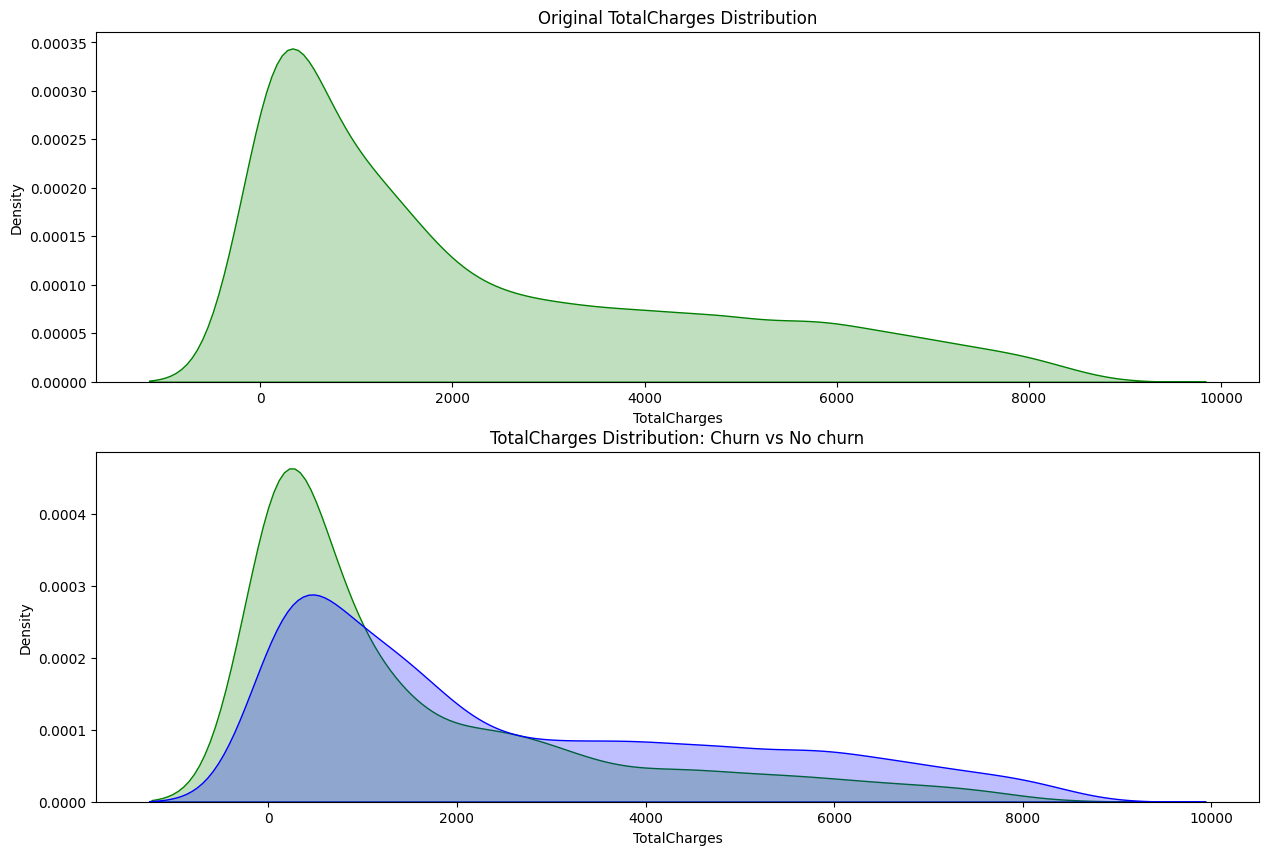

In [ ]:
Numerical_distribution(df_cal, 'TotalCharges')

# Cluster Analysis

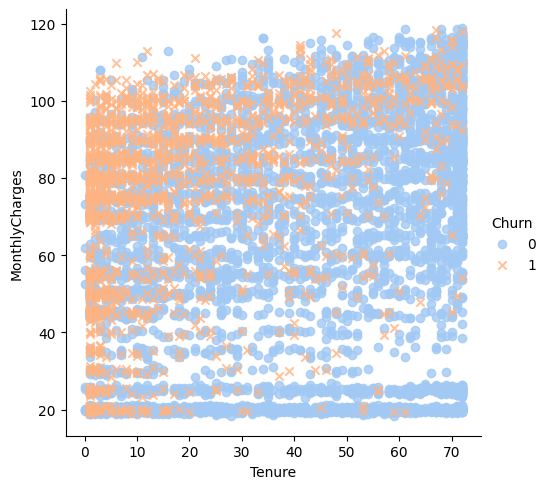

In [ ]:
sns.lmplot(x='Tenure'
           ,y='MonthlyCharges'
           ,data=df_cal
           ,hue='Churn'
            ,fit_reg=False
            ,markers=["o", "x"]
            ,palette= plotColor)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

def Normalize_feature(feature):
    """Return normalized features"""
    return StandardScaler().fit_transform(feature)


In [ ]:
df_cal['Tenure_norm'] = Normalize_feature(df_cal[['Tenure']])
df_cal['MonthlyCharges_norm'] = Normalize_feature(df_cal[['MonthlyCharges']])


In [ ]:
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,Tenure_norm,MonthlyCharges_norm
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,-1.277445,-1.160323
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,One year,0,Mailed check,56.95,1889.50,0,1,1,0.066327,-0.259629
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,-1.236724,-0.362660
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0.514251,-0.746535
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,-1.236724,0.197365


In [ ]:
from sklearn.cluster import KMeans
def Create_elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data

    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]

    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()

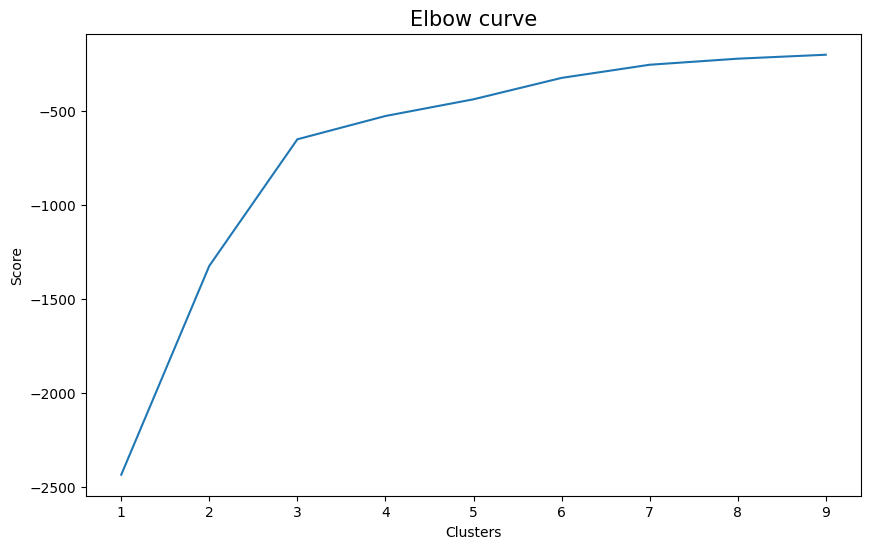

In [ ]:
# checking number of clusters

Create_elbow_curve(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title, random_state=42):
    """Create K-means clusters and plot the scatter graph"""

    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(data)

    # Plot clusters
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=data.iloc[:,0], y=data.iloc[:,1], hue=clusters, palette='Set2')
    plt.title(chart_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.legend(title='Cluster')
    plt.show()

    return clusters


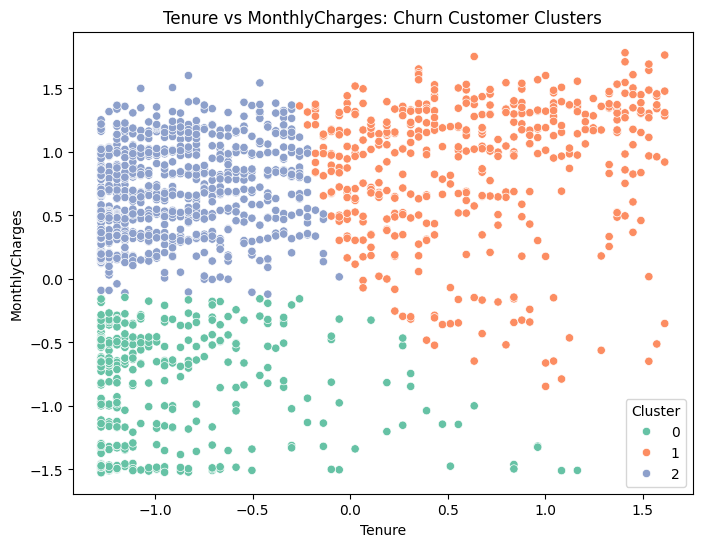

In [ ]:
df_cal['Cluster'] = -1  # default value

df_cal.loc[df_cal.Churn == 1, 'Cluster'] = Create_kmeans_cluster_graph(
    df_cal,
    df_cal[df_cal.Churn == 1][['Tenure_norm', 'MonthlyCharges_norm']],
    n_clusters=3,
    x_title='Tenure',
    y_title='MonthlyCharges',
    chart_title='Tenure vs MonthlyCharges: Churn Customer Clusters'
)


In [ ]:
print(df_cal['Cluster'].unique())


[-1  0  2  1]


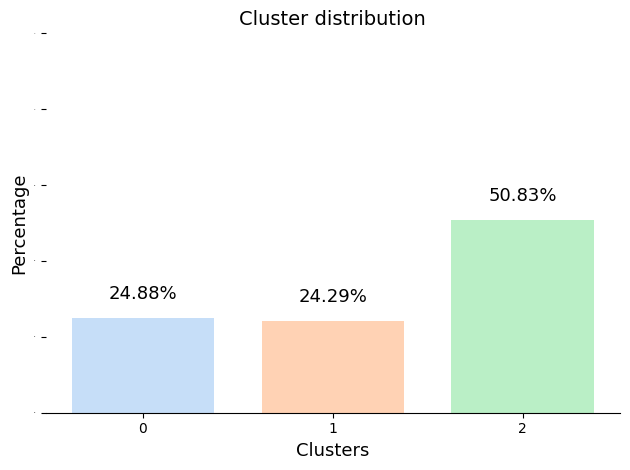

In [ ]:
# Distribution of clusters
churn_distribution =  df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= churn_distribution.index
                   , y = churn_distribution.values
                   , x_title = 'Clusters'
                   , y_title = 'Percentage'
                   , chart_title = 'Cluster distribution'
                  , color = plotColor)

Based on K-means cluster graph, we can see that there are three groups.

Low Tenure and High Monthly Charges (Green cluster)

High Tenure and High Monthly Charges (Red cluster)

Low Tenure and Low Monthly Charges (Blue cluster)

And From distribution graph shows that around 50% of the customers belong to cluster Low Tenure and High Monthly Charges.

In [ ]:
# Total churned customers
overall_gender_dist = df_cal[df_cal['Churn'] == 1]['Gender'].value_counts(normalize=True)

# Percentage of females
overall_female_pct = overall_gender_dist['Female'] * 100  # → 50.2%


In [ ]:
overall_female_pct

np.float64(50.24077046548957)

In [ ]:
# Gender distribution in cluster 2 among churned customers
cluster2_gender_dist = df_cal[(df_cal['Churn'] == 1) & (df_cal['Cluster'] == 2)]['Gender'].value_counts(normalize=True)

# Percentage of females in cluster 2
cluster2_female_pct = cluster2_gender_dist['Female'] * 100  # → 53.15%


In [ ]:
cluster2_female_pct

np.float64(53.1578947368421)

 More females are in cluster 2 → maybe females are more likely to churn when their tenure is short and charges are high.

In [ ]:
# Normalize tenure and monthly charges
scaler = StandardScaler()
df_cal['Tenure_norm'] = scaler.fit_transform(df_cal[['Tenure']])
df_cal['MonthlyCharges_norm'] = scaler.fit_transform(df_cal[['MonthlyCharges']])

# Apply KMeans clustering ONLY on churned customers
df_cal['Cluster'] = -1  # initialize

# Subset of churned customers
churn_data = df_cal[df_cal['Churn'] == 1][['Tenure_norm', 'MonthlyCharges_norm']]

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(churn_data)

# Assign clusters back to main DataFrame
df_cal.loc[df_cal['Churn'] == 1, 'Cluster'] = clusters


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def Extract_highest_in_cluster(df_cal, df_cluster, feature, tenure_charges_cluster_df):
    """Compare cluster feature % with overall churn % and find overrepresented features"""

    df = df_cal.copy()

    # Overall churned customer distribution
    feature_churn_dist = df[df['Churn'] == 1][feature].value_counts(normalize=True).reset_index()
    feature_churn_dist.columns = [feature, 'Percentage']

    # Feature distribution within clusters
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame().reset_index()
    feature_cluster_dist.columns = [feature, 'Percentage']
    feature_cluster_dist['Cluster'] = df_cluster['Cluster'].iloc[0]  # fixed for each call

    # Grouped stats
    tenure_MonthlyCharges_df = df[df['Churn'] == 1].groupby(['Cluster', feature], as_index=False)[['Tenure', 'MonthlyCharges']].mean()

    for _, row in feature_cluster_dist.iterrows():
        label = row[feature]
        cluster = row['Cluster']
        cluster_val = row['Percentage']
        feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Percentage']

        if len(feature_val.values) > 0 and cluster_val > feature_val.values[0]:
            avg_row = tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster'] == cluster) &
                                               (tenure_MonthlyCharges_df[feature] == label)]
            if avg_row.empty:
                continue  # avoid KeyError

            row_data = {
                'Category': feature,
                'Label': ("Not have a " + feature) if (df[feature].dtype == 'int64' and label == 0)
                         else (("Have a " + feature) if (df[feature].dtype == 'int64' and label == 1) else label),
                'Percentage': cluster_val,
                'Cluster': cluster,
                'Avg_Tenure': round(avg_row['Tenure'].values[0], 2),
                'Avg_MonthlyCharges': round(avg_row['MonthlyCharges'].values[0], 2),
                'Represent_in_graph': 0 if (label == 0 or label == 'No') else 1,
                'Label_in_graph': feature if df[feature].dtype == 'int64' else label
            }

            tenure_charges_cluster_df = pd.concat(
                [tenure_charges_cluster_df, pd.DataFrame([row_data])],
                ignore_index=True
            )

    return tenure_charges_cluster_df


In [ ]:
# Create base DataFrame
tenure_charges_cluster_df = pd.DataFrame()

# Loop through all features
categorical_features = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetServiceType', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'ContractType', 'PaperlessBilling', 'PaymentMethod', 'InternetService']

# Process each cluster separately
for cluster in df_cal[df_cal['Churn'] == 1]['Cluster'].unique():
    df_cluster_gp = df_cal[(df_cal['Churn'] == 1) & (df_cal['Cluster'] == cluster)]

    for feature in categorical_features:
        tenure_charges_cluster_df = Extract_highest_in_cluster(
            df_cal,
            df_cluster_gp,
            feature,
            tenure_charges_cluster_df
        )


# Cluster 1 - Low Tenure and Low Monthly Charges

In [ ]:
# Final result
tenure_charges_cluster_df.head(10)


,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
0,Gender,Male,0.535484,0.0,7.73,38.82,1,Male
1,SeniorCitizen,Not have a SeniorCitizen,0.862366,0.0,7.72,38.33,0,SeniorCitizen
2,Partner,Not have a Partner,0.752688,0.0,6.31,38.52,0,Partner
3,Dependents,Have a Dependents,0.197849,0.0,9.61,38.21,1,Dependents
4,PhoneService,Not have a PhoneService,0.318280,0.0,10.19,35.52,0,PhoneService
5,MultipleLines,Not have a MultipleLines,0.909677,0.0,7.31,37.50,0,MultipleLines
6,InternetServiceType,DSL,0.756989,0.0,7.67,44.10,1,DSL
7,InternetServiceType,No,0.243011,0.0,8.24,20.37,0,No
8,OnlineSecurity,Not have a OnlineSecurity,0.864516,0.0,7.32,36.76,0,OnlineSecurity
9,OnlineBackup,Not have a OnlineBackup,0.858065,0.0,7.16,37.12,0,OnlineBackup


# Cluster 2 - Low Tenure and High Monthly Charges

In [ ]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==1]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
35,Gender,Male,0.519824,1.0,49.25,92.21,1,Male
36,SeniorCitizen,Have a SeniorCitizen,0.332599,1.0,46.03,92.03,1,SeniorCitizen
37,Partner,Have a Partner,0.594714,1.0,49.23,92.24,1,Partner
38,Dependents,Have a Dependents,0.222467,1.0,48.75,90.94,1,Dependents
39,PhoneService,Have a PhoneService,0.951542,1.0,47.28,93.93,1,PhoneService
40,MultipleLines,Have a MultipleLines,0.748899,1.0,48.33,96.74,1,MultipleLines
41,InternetServiceType,Fiber optic,0.854626,1.0,47.16,96.70,1,Fiber optic
42,OnlineSecurity,Have a OnlineSecurity,0.286344,1.0,50.43,93.32,1,OnlineSecurity
43,OnlineBackup,Have a OnlineBackup,0.539648,1.0,50.72,94.15,1,OnlineBackup
44,DeviceProtection,Have a DeviceProtection,0.537445,1.0,49.98,96.36,1,DeviceProtection



# Cluster 2 - High Tenure and High Monthly Charges

In [ ]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==2]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
18,Gender,Female,0.531579,2.0,8.47,83.47,1,Female
19,SeniorCitizen,Have a SeniorCitizen,0.274737,2.0,9.67,84.56,1,SeniorCitizen
20,Partner,Not have a Partner,0.701053,2.0,7.94,83.28,0,Partner
21,Dependents,Not have a Dependents,0.860000,2.0,8.56,83.91,0,Dependents
22,PhoneService,Have a PhoneService,1.000000,2.0,8.81,83.80,1,PhoneService
23,MultipleLines,Have a MultipleLines,0.492632,2.0,10.57,87.30,1,MultipleLines
24,InternetServiceType,Fiber optic,0.956842,2.0,8.69,84.47,1,Fiber optic
25,OnlineSecurity,Not have a OnlineSecurity,0.892632,2.0,8.30,83.39,0,OnlineSecurity
26,OnlineBackup,Not have a OnlineBackup,0.776842,2.0,7.94,82.29,0,OnlineBackup
27,DeviceProtection,Not have a DeviceProtection,0.749474,2.0,8.07,81.48,0,DeviceProtection


In [ ]:
!pip install adjustText


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from adjustText import adjust_text

# Define plot colors and markers
plotColor = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'gray']
markers = ['o', 's', '^', 'D', 'X', 'P', '*', '<', '>']


In [ ]:
def Create_kmeans_cluster_with_label(data, cluster_visualize_gp, x_title, y_title, chart_title):
    """Generate labeled K-means clusters on churned customer demographic insights"""

    fig, ax = plt.subplots(figsize=(12, 8))

    # Scatter plot of all data points
    plt.scatter(
        data[x_title],
        data[y_title],
        c=[plotColor[int(c)] for c in data['Cluster']],
        alpha=0.25,
        s=15
    )

    annotations = []
    legend_list = []

    # Unique categories (Gender, Partner, etc.)
    category_color = cluster_visualize_gp[['Category']].drop_duplicates().reset_index(drop=True)

    for i, row in cluster_visualize_gp.iterrows():
        x = row['Avg_Tenure']
        y = row['Avg_MonthlyCharges']
        label = row['Label_in_graph']
        category = row['Category']
        cat_idx = category_color[category_color['Category'] == category].index[0]

        # Label annotation
        annotations.append(
            ax.text(
                x, y, label,
                fontsize=13,
                weight='bold'
            )
        )

        # Marker at cluster center
        ax.scatter(
            x, y,
            color=plotColor[cat_idx],
            marker=markers[cat_idx],
            s=120,
            label=label
        )

    # Legend (only category-wise)
    for key, category in enumerate(category_color['Category']):
        legend_list.append(
            mlines.Line2D([], [], linestyle='None',
                          color=plotColor[key],
                          marker=markers[key],
                          markersize=10,
                          label=category)
        )

    # Adjust label overlap
    adjust_text(annotations,
                x=cluster_visualize_gp['Avg_Tenure'],
                y=cluster_visualize_gp['Avg_MonthlyCharges'])

    plt.legend(handles=legend_list, loc='lower right')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title, fontsize=15)
    plt.grid(True)
    plt.show()


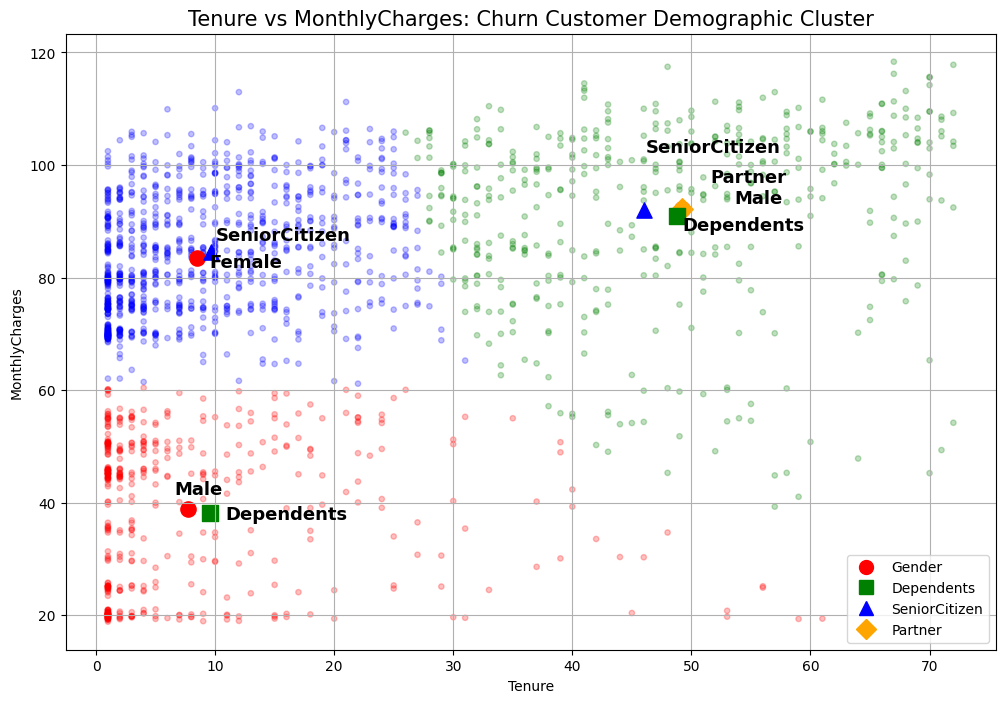

In [ ]:
# Filter for demographic-related clusters
cluster_with_label_gp = tenure_charges_cluster_df[
    (tenure_charges_cluster_df['Represent_in_graph'] == 1) &
    (tenure_charges_cluster_df['Category'].isin(['Gender', 'SeniorCitizen', 'Partner', 'Dependents']))
]

# Call the plotting function
Create_kmeans_cluster_with_label(
    df_cal[df_cal['Churn'] == 1][['Tenure', 'MonthlyCharges', 'Cluster']],
    cluster_with_label_gp.reset_index(drop=True),
    'Tenure',
    'MonthlyCharges',
    "Tenure vs MonthlyCharges: Churn Customer Demographic Cluster"
)


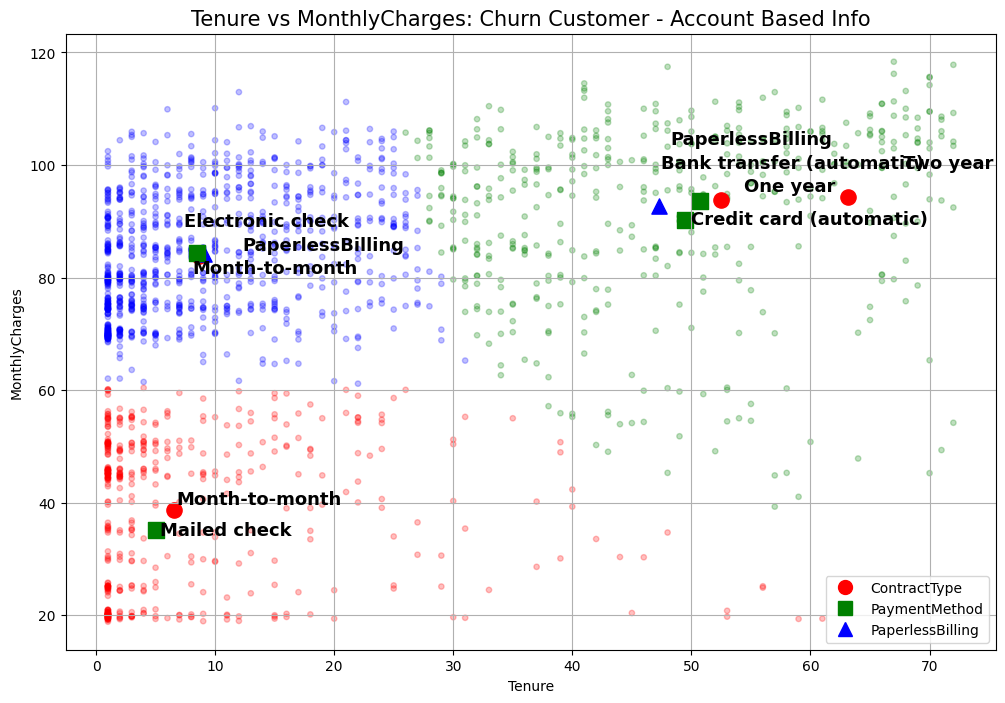

In [ ]:
# Corrected filter: Category name should be 'PaymentMethod' not 'PaymentMethods'
cluster_with_label_gp = tenure_charges_cluster_df[
    (tenure_charges_cluster_df['Represent_in_graph'] == 1) &
    (tenure_charges_cluster_df['Category'].isin([
        'ContractType', 'PaperlessBilling', 'PaymentMethod'
    ]))
]

# Call the cluster visualization function
Create_kmeans_cluster_with_label(
    df_cal[df_cal['Churn'] == 1][['Tenure', 'MonthlyCharges', 'Cluster']],
    cluster_with_label_gp.reset_index(drop=True),
    'Tenure',
    'MonthlyCharges',
    "Tenure vs MonthlyCharges: Churn Customer - Account Based Info"
)


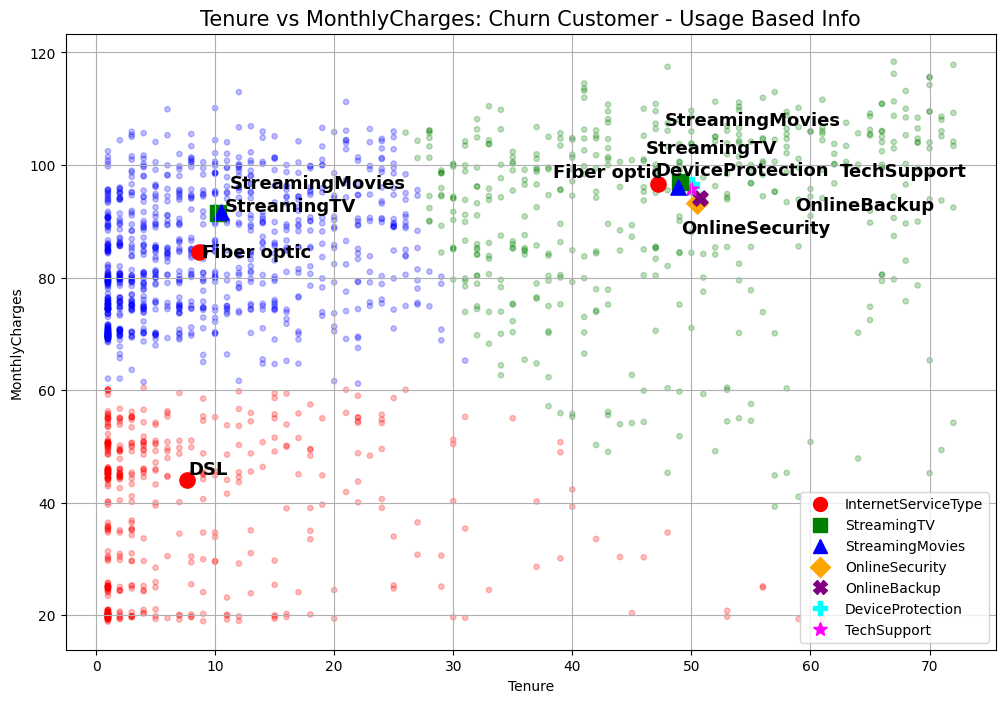

In [ ]:
# Filter usage-based features (fixed typo: OnlineSupport ➜ OnlineSecurity)
cluster_with_label_gp = tenure_charges_cluster_df[
    (tenure_charges_cluster_df['Represent_in_graph'] == 1) &
    (tenure_charges_cluster_df['Category'].isin([
        'StreamingTV',
        'StreamingMovies',
        'TechSupport',
        'DeviceProtection',
        'OnlineSecurity',      # ✅ corrected from 'OnlineSupport'
        'OnlineBackup',
        'InternetServiceType'  # ✅ keep if your data uses this column
    ]))
]

# Create cluster visualization
Create_kmeans_cluster_with_label(
    df_cal[df_cal['Churn'] == 1][['Tenure', 'MonthlyCharges', 'Cluster']],
    cluster_with_label_gp.reset_index(drop=True),
    'Tenure',
    'MonthlyCharges',
    "Tenure vs MonthlyCharges: Churn Customer - Usage Based Info"
)


# DATA PREPROCESSING


In [ ]:
df_model = Data_transformation_renaming(df_raw)
df_model.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from collections import Counter

# Set random seed
random_state = 42

# -----------------------------
# Normalize a feature column
# -----------------------------
def Normalize_feature(col):
    scaler = MinMaxScaler()
    return scaler.fit_transform(col)

# -----------------------------
# Shuffle the dataset
# -----------------------------
def Shuffle_data(df):
    return shuffle(df, random_state=random_state).reset_index(drop=True)

# -----------------------------
# One-hot encode given features
# -----------------------------
def One_hot_encoding(df, feature_list):
    return pd.concat([df, pd.get_dummies(df[feature_list], drop_first=True)], axis=1)

# -----------------------------
# Normalize all numerical columns
# -----------------------------
def Normalize_df(data, cols):
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
    return data

# -----------------------------
# Prepare model input features and target
# -----------------------------
def Create_model_df(df, cat_cols, nom_cols, binary_cols, num_cols, target_col):
    # Step 1: One-hot encode nominal features
    df_encoded = One_hot_encoding(df, nom_cols)
    df_encoded.drop(columns=nom_cols, inplace=True)

    # Step 2: One-hot encode binary and categorical columns
    df_encoded = pd.get_dummies(df_encoded, columns=cat_cols + binary_cols, drop_first=True)

    # Step 3: Normalize numeric columns
    df_encoded = Normalize_df(df_encoded, num_cols)

    # Step 4: Shuffle the dataset
    df_encoded = Shuffle_data(df_encoded)

    # Step 5: Drop non-feature columns like CustomerID and split X and y
    X = df_encoded.drop(columns=target_col + ['CustomerID'])  # ✅ Drop 'CustomerID'
    y = df_encoded[target_col].values.flatten()

    return X, y

# -----------------------------
# Train-test split
# -----------------------------
def Train_test_df(feature, target, test_size):
    return train_test_split(feature, target, test_size=test_size, random_state=random_state)

# -----------------------------
#  Set correct column lists
# -----------------------------
cat_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'PaperlessBilling', 'IsContracted']

nominal_cols = ['InternetServiceType', 'ContractType', 'PaymentMethod', 'InternetService']
binary_cols = []  # already included in cat_cols
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
target_col = 'Churn'

# -----------------------------
#  Load your dataset (already done)
# -----------------------------
# df_model = pd.read_csv('telecom_churn.csv')  # already available in your session

# -----------------------------
#  Create model-ready data
# -----------------------------
df_model_feature, df_model_target = Create_model_df(
    df_model,
    cat_cols,
    nominal_cols,
    binary_cols,
    num_cols,
    [target_col]
)

# Train-test split
x_train, x_test, y_train, y_test = Train_test_df(df_model_feature, df_model_target, test_size=0.2)

# Check all x_train columns are numeric
print("Non-numeric columns in x_train:", x_train.select_dtypes(include='object').columns.tolist())

# -----------------------------
#  Apply SMOTE
# -----------------------------
print("Before SMOTE class distribution:", Counter(y_train))

sm = SMOTE(random_state=random_state, sampling_strategy=1.0)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# -----------------------------
#  Output summary
# -----------------------------
print("----------------------------")
print("Original x_train shape:", x_train.shape)
print("Resampled x_train shape:", x_train_sm.shape)
print("After SMOTE class distribution:", Counter(y_train_sm))
print("----------------------------")


Non-numeric columns in x_train: []
Before SMOTE class distribution: Counter({np.int64(0): 4132, np.int64(1): 1502})
----------------------------
Original x_train shape: (5634, 24)
Resampled x_train shape: (8264, 24)
After SMOTE class distribution: Counter({np.int64(0): 4132, np.int64(1): 4132})
----------------------------


In [ ]:
print("Available columns in df_model:")
print(df_model.columns.tolist())


Available columns in df_model:
['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetServiceType', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'ContractType', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService', 'IsContracted']


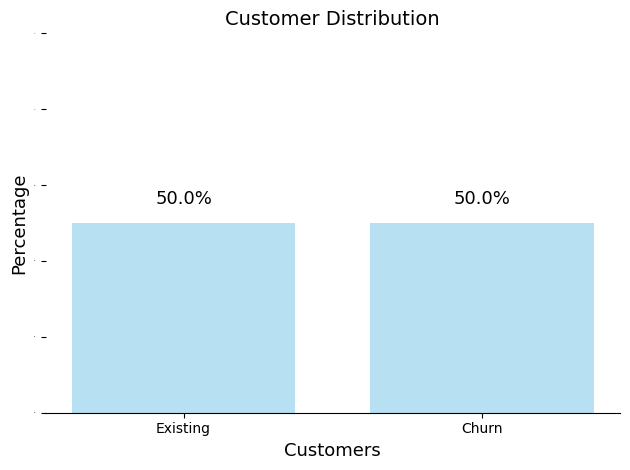

In [ ]:
# After upsampling distribution in train dataset

Churn_rate = pd.value_counts(y_train_sm) / len(y_train_sm)
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

In [ ]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Original data models
clsLR = LogisticRegression(random_state=42)
clsRF = RandomForestClassifier(random_state=42)
clsGB = GradientBoostingClassifier(random_state=42)

clsModels = [clsLR, clsRF, clsGB]
clsModelsNm = ["Logistic Regression", "Random Forest", "Gradient boosting"]


In [ ]:
clsParams = {
    'Logistic Regression': {
        'C': [0.1, 0.5, 1],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'max_depth': [5, 10, 15],
        'n_estimators': [100, 150],
        'max_features': ['sqrt'],  # ✅ FIXED: use 'sqrt' instead of 'auto'
        'min_samples_leaf': [1, 5]
    },
    'Gradient boosting': {
        'learning_rate': [0.05, 0.1],
        'n_estimators': [100, 150],
        'max_depth': [3, 5],
        'min_samples_split': [0.1],
        'min_samples_leaf': [5, 10],
        'subsample': [0.7, 1]
    }
}



In [ ]:
from sklearn.model_selection import GridSearchCV

def Parameter_tunning(x, y, models, names, param_grid, score):
    tuned_params = {}
    for i, model in enumerate(models):
        print("Tuning:", names[i])
        grid = GridSearchCV(estimator=model,
                            param_grid=param_grid[names[i]],
                            scoring=score,
                            cv=5,
                            n_jobs=-1)
        grid.fit(x, y)
        print("Best Score:", grid.best_score_)
        print("Best Params:", grid.best_params_)
        tuned_params[names[i]] = grid.best_params_
    return tuned_params

tuned_params = Parameter_tunning(x_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')


Tuning: Logistic Regression
Best Score: -0.41545838847767314
Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Tuning: Random Forest
Best Score: -0.4134122422705957
Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 150}
Tuning: Gradient boosting
Best Score: -0.40985284629010216
Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 0.1, 'n_estimators': 100, 'subsample': 0.7}


In [ ]:
clsLR = LogisticRegression(random_state=42, **tuned_params["Logistic Regression"])
clsRF = RandomForestClassifier(random_state=42, **tuned_params["Random Forest"])
clsGB = GradientBoostingClassifier(random_state=42, **tuned_params["Gradient boosting"])

clsModels = [clsLR, clsRF, clsGB]


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], label="Precision")
    plt.plot(thresholds, recalls[:-1], label="Recall")
    plt.plot(thresholds, 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]), label="F1")
    plt.title("Precision, Recall & F1 vs Threshold")
    plt.xlabel("Threshold")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
def Cross_validation_score(models, names, data, metrics_list):
    for i, model in enumerate(models):
        print("===============", names[i], "===============")
        for x, y, label in data:
            print(">> Dataset:", label)
            for score in metrics_list:
                scores = cross_val_score(model, x, y, scoring=score, cv=5)
                print(score, ":", round(scores.mean(), 4))

            y_scores = cross_val_predict(model, x, y, method='predict_proba', cv=5)
            precisions, recalls, thresholds = metrics.precision_recall_curve(y, y_scores[:, 1])
            plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

            f1 = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
            max_f1_idx = f1.argmax()
            print("Best Threshold for Max F1:", round(thresholds[max_f1_idx], 4))


=============== Logistic Regression ===============
>> Dataset: Original data
accuracy : 0.8088
precision : 0.6702
recall : 0.5592
f1 : 0.6093
neg_log_loss : -0.4155


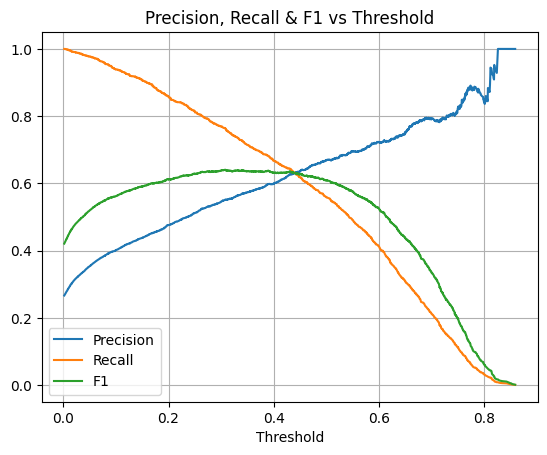

Best Threshold for Max F1: 0.3074
=============== Random Forest ===============
>> Dataset: Original data
accuracy : 0.8072
precision : 0.6795
recall : 0.5259
f1 : 0.5926
neg_log_loss : -0.4134


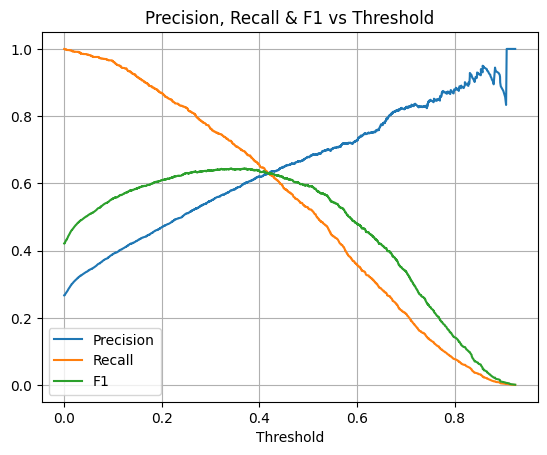

Best Threshold for Max F1: 0.341
=============== Gradient boosting ===============
>> Dataset: Original data
accuracy : 0.8053
precision : 0.6682
recall : 0.5366
f1 : 0.5947
neg_log_loss : -0.4099


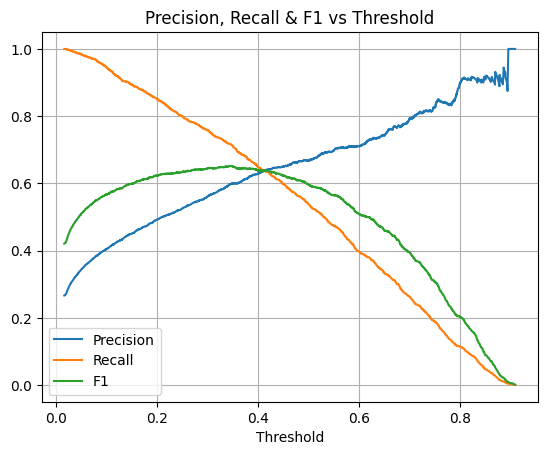

Best Threshold for Max F1: 0.3438


In [ ]:
scoreMatrix = ['accuracy', 'precision', 'recall', 'f1', 'neg_log_loss']
Cross_validation_score(clsModels, clsModelsNm, [(x_train, y_train, 'Original data')], scoreMatrix)


In [ ]:
import seaborn as sns
import numpy as np
import math

def Cus_log_loss(y_true, y_prob):
    y_true = [float(y) for y in y_true]
    y_prob = [min(max(p, 1e-15), 1 - 1e-15) for p in y_prob]
    return -1.0 / len(y_true) * sum([
        y_true[i] * math.log(y_prob[i]) + (1.0 - y_true[i]) * math.log(1.0 - y_prob[i])
        for i in range(len(y_prob))
    ])

def Model_evaluation(models, names, x_train, y_train, x_test, y_test, thresholds):
    for i, model in enumerate(models):
        model.fit(x_train, y_train)
        y_proba = model.predict_proba(x_test)[:, 1]
        y_pred = (y_proba >= thresholds[i]).astype(int)

        print(f"*********** {names[i]} ***********")
        print(metrics.classification_report(y_test, y_pred))
        print("Log loss score:", round(Cus_log_loss(y_test, y_proba), 4))

        cm = metrics.confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix: {names[i]}")
        plt.show()


*********** Logistic Regression ***********
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1042
           1       0.51      0.76      0.61       367

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409

Log loss score: 0.4267


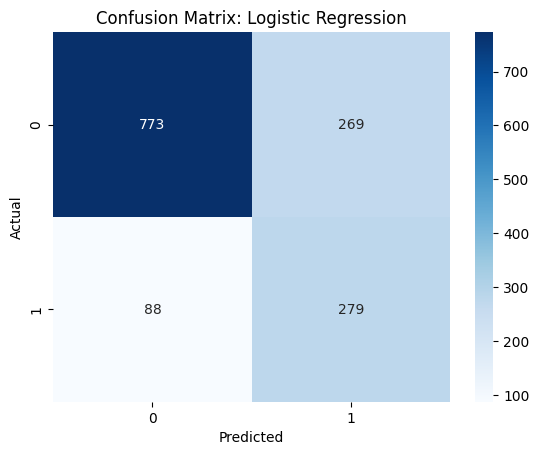

*********** Random Forest ***********
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1042
           1       0.51      0.77      0.62       367

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409

Log loss score: 0.422


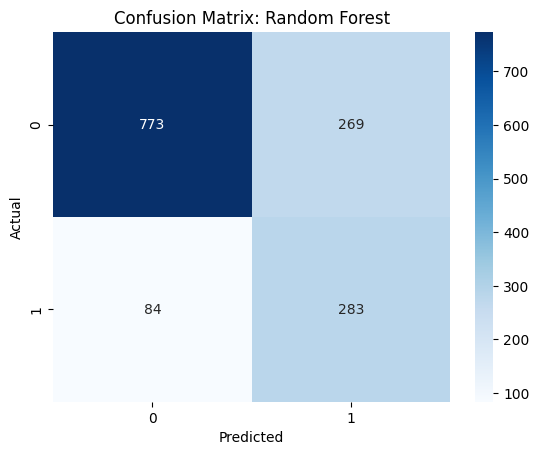

*********** Gradient boosting ***********
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1042
           1       0.53      0.75      0.62       367

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

Log loss score: 0.419


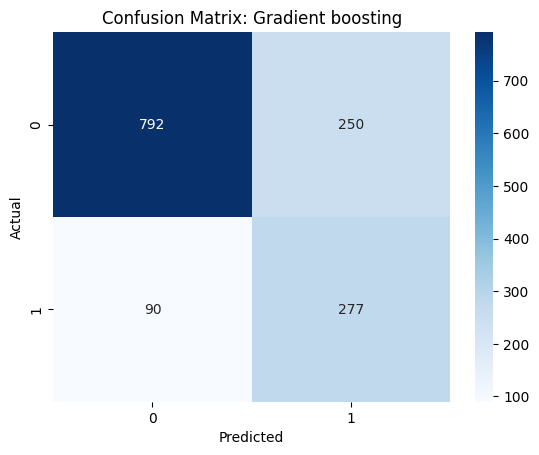

In [ ]:
Model_evaluation(clsModels, clsModelsNm, x_train, y_train, x_test, y_test, [0.31, 0.30, 0.30])


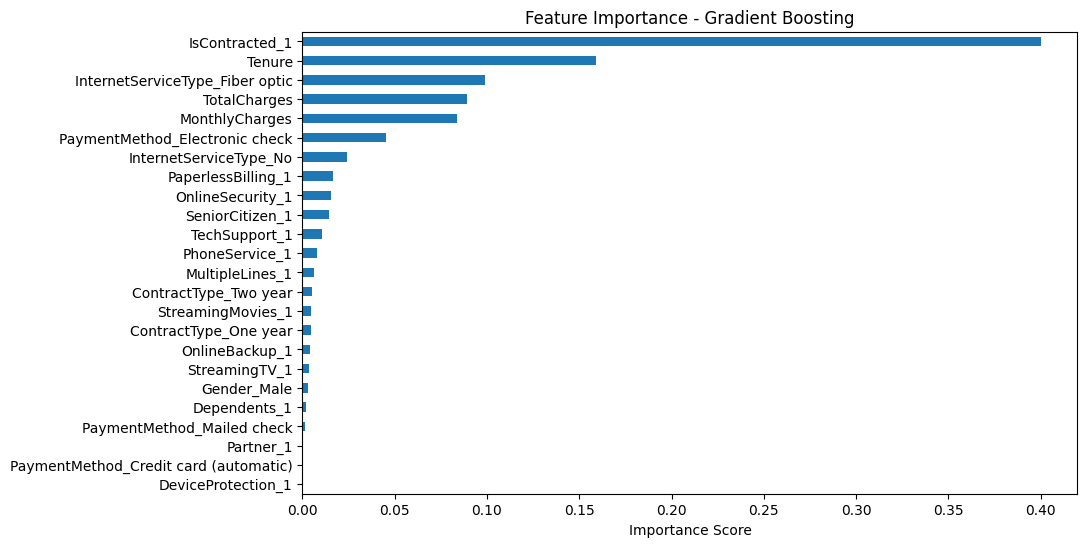

In [ ]:
feature_importance = pd.Series(clsGB.feature_importances_, index=x_train.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
churn_customer_prob = pd.DataFrame({
    'Predicted_proba': clsGB.predict_proba(x_test)[:, 1],
    'Predicted': clsGB.predict(x_test)
})
churn_customer_prob.head()


,Predicted_proba,Predicted
0,0.020102,0
1,0.379919,0
2,0.020077,0
3,0.193726,0
4,0.524854,1


In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

clsXGB = XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='logloss')
clsDT = DecisionTreeClassifier(random_state=random_state)

clsModels_extra = [clsDT, clsXGB]
clsModelsNm_extra = ["Decision Tree", "XGBoost"]


In [ ]:
clsParams_extra = {
    "Decision Tree": {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 5]
    },
    "XGBoost": {
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [100],
        'subsample': [0.7, 1],
        'colsample_bytree': [0.7, 1]
    }
}


In [ ]:
tuned_params_extra = Parameter_tunning(
    x_train, y_train,
    clsModels_extra,
    clsModelsNm_extra,
    clsParams_extra,
    score='neg_log_loss'
)


Tuning: Decision Tree
Best Score: -0.43590654124432826
Best Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuning: XGBoost
Best Score: -0.4104635480101506
Best Params: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}


In [ ]:
clsDT_final = DecisionTreeClassifier(
    random_state=random_state,
    **tuned_params_extra.get('Decision Tree', {}).get('params', {})
)

clsXGB_final = XGBClassifier(
    random_state=random_state,
    use_label_encoder=False,
    eval_metric='logloss',
    **tuned_params_extra.get('XGBoost', {}).get('params', {})
)


=============== Decision Tree ===============
>> Dataset: Original Data
accuracy : 0.7345
precision : 0.5022
recall : 0.508
f1 : 0.505
neg_log_loss : -9.5217


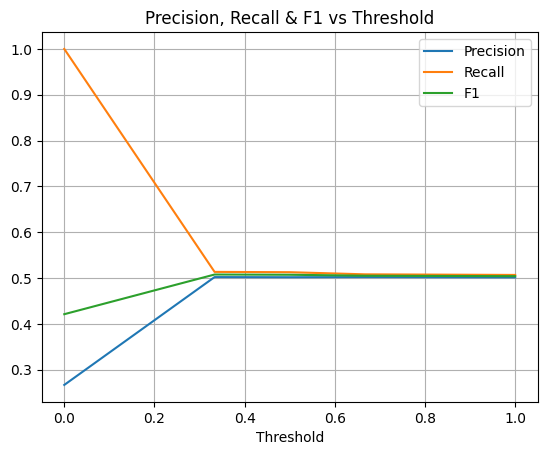

Best Threshold for Max F1: 0.3333
=============== XGBoost ===============
>> Dataset: Original Data
accuracy : 0.787
precision : 0.6156
recall : 0.5393
f1 : 0.5746
neg_log_loss : -0.4817


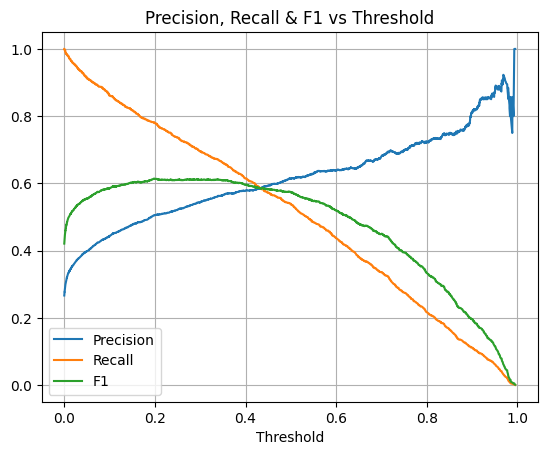

Best Threshold for Max F1: 0.1984


In [ ]:
clsModels_extra_final = [clsDT_final, clsXGB_final]
clsModelsNm_extra_final = ["Decision Tree", "XGBoost"]

Cross_validation_score(
    clsModels_extra_final,
    clsModelsNm_extra_final,
    [(x_train, y_train, "Original Data")],
    scoreMatrix  # already defined as ['accuracy','precision','recall','f1','neg_log_loss']
)


*********** Decision Tree ***********
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1042
           1       0.46      0.49      0.47       367

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

Log loss score: 9.5865


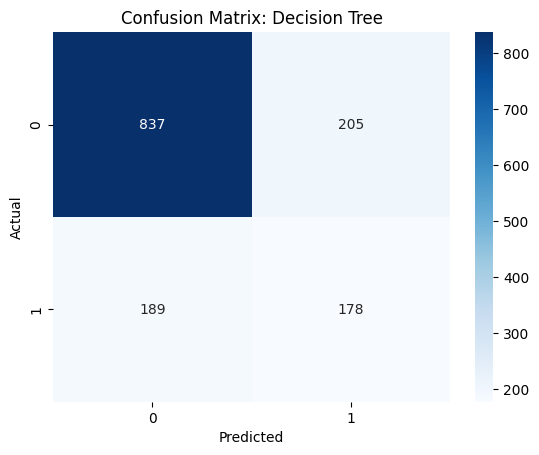

*********** XGBoost ***********
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1042
           1       0.46      0.80      0.59       367

    accuracy                           0.71      1409
   macro avg       0.68      0.74      0.68      1409
weighted avg       0.79      0.71      0.72      1409

Log loss score: 0.4813


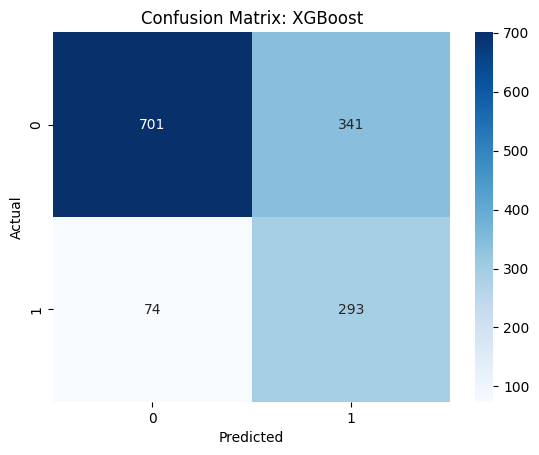

In [ ]:
Decision_tree_threshold = 0.3333  # Replace with actual threshold from graph
XGBoost_threshold = 0.1984        # Replace with actual threshold from graph

Model_evaluation(
    clsModels_extra_final,
    clsModelsNm_extra_final,
    x_train,
    y_train,
    x_test,
    y_test,
    [Decision_tree_threshold, XGBoost_threshold]
)


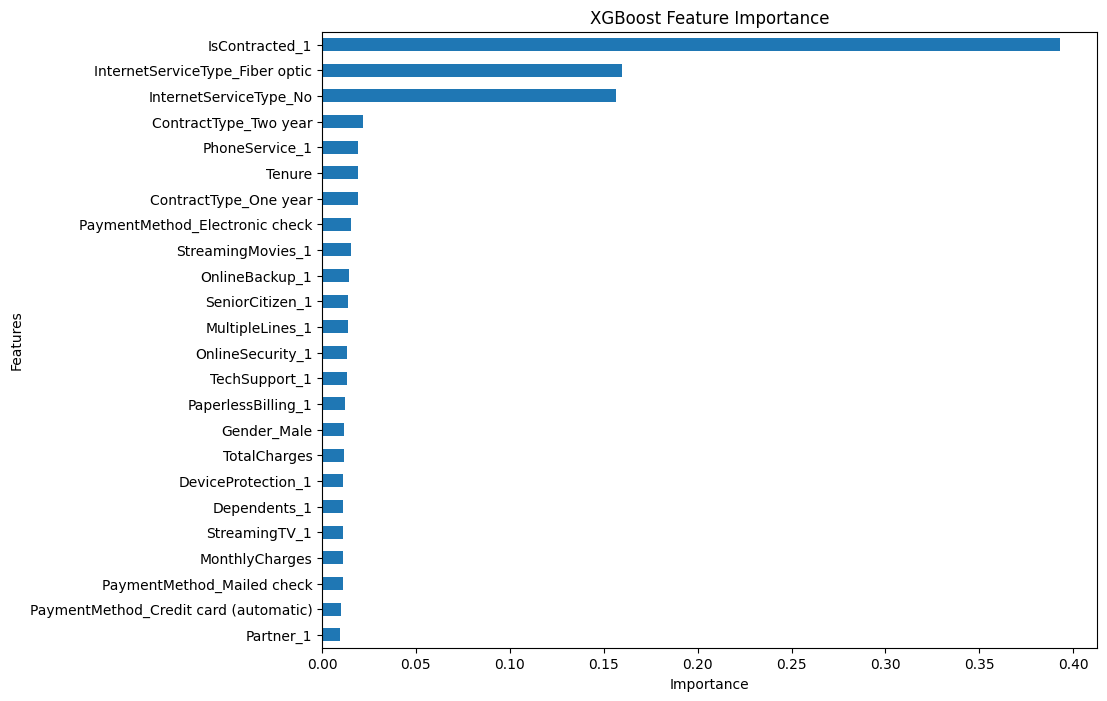

In [ ]:
xgb_importance = pd.Series(clsXGB_final.feature_importances_, index=x_train.columns)
xgb_importance.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


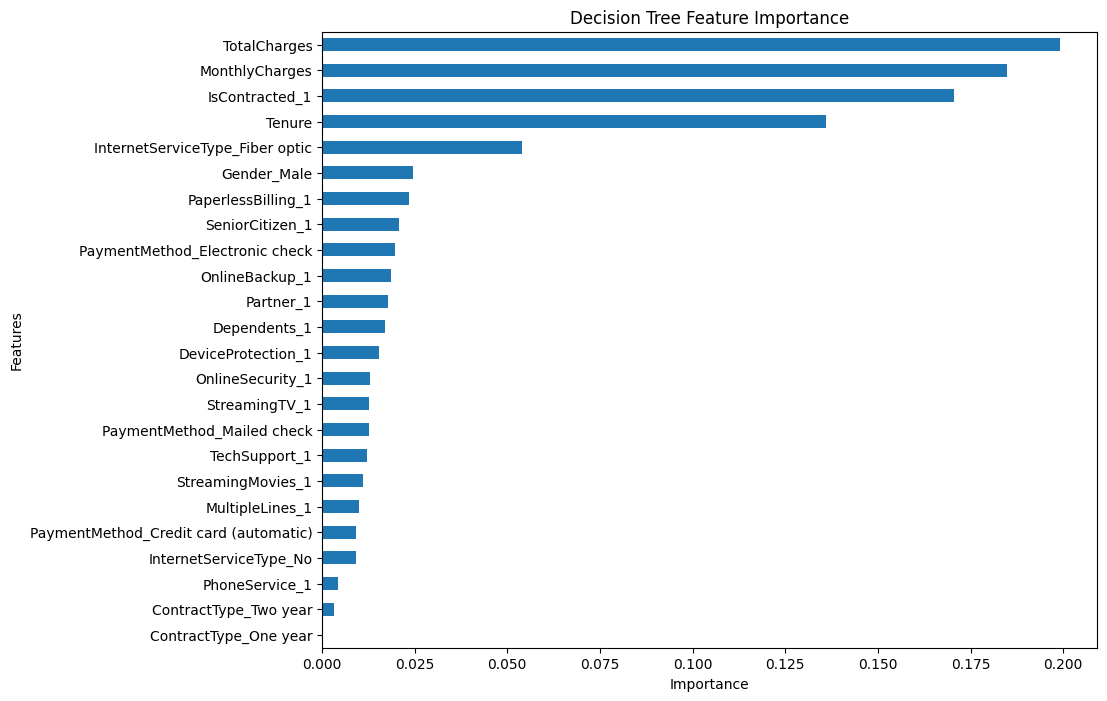

In [ ]:
dt_importance = pd.Series(clsDT_final.feature_importances_, index=x_train.columns)
dt_importance.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
# Step 1: Combine models
all_models = clsModels + clsModels_extra_final
all_model_names = clsModelsNm + clsModelsNm_extra_final

# Thresholds (replace with your final chosen values)
thresholds = [
    0.3074,  # Logistic Regression
    0.341,  # Random Forest
    0.3438,  # Gradient Boosting
    0.33,  # Decision Tree
    0.1984   # XGBoost
]

# Step 3: Create prediction DataFrame
predicted_df = pd.DataFrame()
predicted_df['Actual'] = y_test  # No .values needed

# Step 4: Loop through models and store predictions
for i, model in enumerate(all_models):
    model.fit(x_train, y_train)
    proba = model.predict_proba(x_test)[:, 1]
    pred = (proba >= thresholds[i]).astype(int)

    model_key = all_model_names[i].replace(" ", "_")
    predicted_df[model_key] = pred
    predicted_df[f"Correct_{model_key}"] = (predicted_df['Actual'] == pred)

# Step 5: Show results
predicted_df.head()


,Actual,Logistic_Regression,Correct_Logistic_Regression,Random_Forest,Correct_Random_Forest,Gradient_boosting,Correct_Gradient_boosting,Decision_Tree,Correct_Decision_Tree,XGBoost,Correct_XGBoost
0,0,0,True,0,True,0,True,0,True,0,True
1,0,1,False,1,False,1,False,1,False,1,False
2,0,0,True,0,True,0,True,0,True,0,True
3,0,0,True,0,True,0,True,0,True,0,True
4,1,1,True,1,True,1,True,0,False,1,True


In [ ]:
for model in all_model_names:
    key = model.replace(" ", "_")
    accuracy = predicted_df[f"Correct_{key}"].mean()
    print(f"{model} Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.75
Random Forest Accuracy: 0.76
Gradient boosting Accuracy: 0.77
Decision Tree Accuracy: 0.72
XGBoost Accuracy: 0.71


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import joblib
import os

# Define path in your Google Drive (change "MyDrive" subfolder if needed)
model_dir = "/content/drive/MyDrive/telecom_models"

# Create the folder if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save original models
joblib.dump(clsModels[0], f"{model_dir}/tele_logistic_regression.sav")



['/content/drive/MyDrive/telecom_models/tele_logistic_regression.sav']

In [ ]:
joblib.dump(clsModels[1], f"{model_dir}/tele_random_forest.sav")


['/content/drive/MyDrive/telecom_models/tele_random_forest.sav']

In [ ]:
joblib.dump(clsModels[2], f"{model_dir}/tele_gradient_boosting.sav")


['/content/drive/MyDrive/telecom_models/tele_gradient_boosting.sav']

In [ ]:

# Save extra models
joblib.dump(clsModels_extra_final[0], f"{model_dir}/tele_decision_tree.sav")


['/content/drive/MyDrive/telecom_models/tele_decision_tree.sav']

In [ ]:
joblib.dump(clsModels_extra_final[1], f"{model_dir}/tele_xgboost.sav")

['/content/drive/MyDrive/telecom_models/tele_xgboost.sav']

In [ ]:
import os

model_dir = "/content/drive/MyDrive/telecom_models"

# List all saved model files
saved_models = os.listdir(model_dir)
print("Saved models in telecom_models folder:")
for model_file in saved_models:
    print(model_file)


Saved models in telecom_models folder:
tele_logistic_regression.sav
tele_random_forest.sav
tele_gradient_boosting.sav
tele_decision_tree.sav
tele_xgboost.sav


In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report

# Load the models
clsLR = joblib.load(f"{model_dir}/tele_logistic_regression.sav")
clsRF = joblib.load(f"{model_dir}/tele_random_forest.sav")
clsGB = joblib.load(f"{model_dir}/tele_gradient_boosting.sav")
clsDT = joblib.load(f"{model_dir}/tele_decision_tree.sav")
clsXGB = joblib.load(f"{model_dir}/tele_xgboost.sav")

# List of models and their names
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting", "Decision Tree", "XGBoost"]
models = [clsLR, clsRF, clsGB, clsDT, clsXGB]

# Make predictions and evaluate
for i, model in enumerate(models):
    print("=====================================")
    print(f"Model: {model_names[i]}")
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1042
           1       0.61      0.53      0.57       367

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1042
           1       0.62      0.50      0.55       367

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1042
           1       0.62      0.52      0.57       367

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
w

In [ ]:
import shutil

# Zip the telecom_models folder
shutil.make_archive("telecom_models", 'zip', "/content/drive/MyDrive/telecom_models")

# Download the zip file
from google.colab import files
files.download("telecom_models.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Add ratio or interaction features
df_model['ChargesPerTenure'] = df_model['TotalCharges'] / (df_model['Tenure'] + 1)

# Flag: is new customer (short tenure)
df_model['IsNewCustomer'] = (df_model['Tenure'] < 6).astype(int)

# Total services count
service_features = ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
df_model['NumServices'] = df_model[service_features].sum(axis=1)


In [ ]:
from lightgbm import LGBMClassifier

clsLGBM = LGBMClassifier(random_state=42)
clsLGBM.fit(x_train, y_train)
print("LGBM Accuracy:", clsLGBM.score(x_test, y_test))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1502, number of negative: 4132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266596 -> initscore=-1.011964
[LightGBM] [Info] Start training from score -1.011964
LGBM Accuracy: 0.7863733144073811


In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('lr', clsLR),
        ('rf', clsRF),
        ('xgb', clsXGB_final)
    ],
    voting='soft'
)

ensemble_model.fit(x_train, y_train)
y_pred = ensemble_model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))


Ensemble Accuracy: 0.7899219304471257


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(3, 10),
    'min_samples_split': uniform(0.1, 0.9),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=25,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

random_search.fit(x_train, y_train)
print("Best Accuracy:", random_search.best_score_)


Best Accuracy: 0.7838129490733663


In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(estimator=clsRF, cv=5, scoring='accuracy')
selector.fit(x_train, y_train)

print("Optimal number of features:", selector.n_features_)

# Reduce training/testing set
x_train_sel = selector.transform(x_train)
x_test_sel = selector.transform(x_test)

# Retrain with selected features
clsRF.fit(x_train_sel, y_train)
print("Accuracy (RFE selected):", clsRF.score(x_test_sel, y_test))


Optimal number of features: 15
Accuracy (RFE selected): 0.7849538679914834


In [ ]:
from sklearn.metrics import accuracy_score

# Get probabilities
y_proba = clsRF.predict_proba(x_test_sel)[:, 1]


# Try thresholds from 0.1 to 0.9
thresholds = np.linspace(0.1, 0.9, 20)
best_acc = 0
best_thresh = 0.5

for thresh in thresholds:
    y_pred = (y_proba >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_thresh = thresh

print("Best threshold for accuracy:", round(best_thresh, 2))
print("Best accuracy:", round(best_acc, 4))


Best threshold for accuracy: 0.56
Best accuracy: 0.7963


In [ ]:
# List of all models and their names
all_models = clsModels + clsModels_extra_final
all_model_names = clsModelsNm + clsModelsNm_extra_final

print("Model Feature Check:\n----------------------")
for model, name in zip(all_models, all_model_names):
    print(f"{name}: trained on {model.n_features_in_} features")

print(f"\nx_test has: {x_test.shape[1]} features")
if 'x_test_sel' in locals():
    print(f"x_test_sel has: {x_test_sel.shape[1]} features")


Model Feature Check:
----------------------
Logistic Regression: trained on 24 features
Random Forest: trained on 24 features
Gradient boosting: trained on 24 features
Decision Tree: trained on 24 features
XGBoost: trained on 24 features

x_test has: 24 features
x_test_sel has: 15 features


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Combine all models and names
all_models = clsModels + clsModels_extra_final
all_model_names = clsModelsNm + clsModelsNm_extra_final

# Store results
pred_vs_actual_list = []
accuracy_summary = []

# Loop through models
for model, name in zip(all_models, all_model_names):
    # Match correct test input shape
    test_data = x_test_sel if model.n_features_in_ == x_test_sel.shape[1] else x_test

    # Predict
    y_pred = model.predict(test_data)

    # Try to get probabilities if supported
    try:
        y_proba = model.predict_proba(test_data)[:, 1]
    except:
        y_proba = [None] * len(y_pred)

    # Store predictions
    for actual, pred, proba in zip(y_test, y_pred, y_proba):
        pred_vs_actual_list.append({
            "Model": name,
            "Actual": actual,
            "Predicted": pred,
            "Probability": round(proba, 4) if proba is not None else None
        })

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_summary.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Test Samples": len(y_test),
        "Features Used": model.n_features_in_
    })

# Final DataFrames
predictions_df = pd.DataFrame(pred_vs_actual_list)
accuracy_df = pd.DataFrame(accuracy_summary)

# Display
print("\n🔍 Accuracy Summary:")
print(accuracy_df.sort_values(by="Accuracy", ascending=False))

print("\n📊 First 20 Actual vs Predicted Samples:")
print(predictions_df.head(20))



🔍 Accuracy Summary:
                 Model  Accuracy  Test Samples  Features Used
2    Gradient boosting    0.7913          1409             24
1        Random Forest    0.7892          1409             24
0  Logistic Regression    0.7878          1409             24
4              XGBoost    0.7700          1409             24
3        Decision Tree    0.7211          1409             24

📊 First 20 Actual vs Predicted Samples:
                  Model  Actual  Predicted  Probability
0   Logistic Regression       0          0       0.0030
1   Logistic Regression       0          0       0.3966
2   Logistic Regression       0          0       0.0029
3   Logistic Regression       0          0       0.2352
4   Logistic Regression       1          1       0.5430
5   Logistic Regression       0          0       0.0187
6   Logistic Regression       0          1       0.5954
7   Logistic Regression       0          1       0.6106
8   Logistic Regression       0          0       0.1652
9   Lo

In [ ]:
import joblib

# Combine all trained models
all_models = clsModels + clsModels_extra_final
all_model_names = clsModelsNm + clsModelsNm_extra_final

# Save each model
for model, name in zip(all_models, all_model_names):
    filename = f"{name.lower().replace(' ', '_')}.sav"
    joblib.dump(model, filename)
    print(f"Saved model: {filename}")


Saved model: logistic_regression.sav
Saved model: random_forest.sav
Saved model: gradient_boosting.sav
Saved model: decision_tree.sav
Saved model: xgboost.sav


In [ ]:
from google.colab import files
files.download('random_forest.sav')  # replace with your model filename
